# Classification
<i> Classifying data based on the features and patterns obsvered by a model. Classification can be single-class, multi-class, and even multi-label in some cases. Metrics like Precision, Recall, Accuracy, F1_score, Confusion Matri and many mode are used.</i>

In [2]:
def accuracy(y_true,y_pred):
    correct_counter = 0
    for yt, yp in zip(y_true,y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter / len(y_true)
        

In [3]:
from sklearn import metrics


In [4]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1,l2)

0.625

True Positive : Model predicts the image belongs to a class and the image does belongs to the class.

True Negative: Model predicts the image does not belongs to the class and the image actually does not belong to the class.

###### Basically the model correctly predicts positive class, it is true positive,and if the mode accurately predicts negative class, it is a true negative.

False positve: Model predicts the image belongs to a class but the image does not belong to the class.

False Negative: Model predicts the image belongs does not to a class but the image does belong to the class.

###### Basically, if the model incorrectly predicts positive class, it is a false positive. If the model incorrectly predicts negative class, it is a false negative. 

In [5]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true,y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [6]:
print("True Positive:",true_positive(l1,l2))
print("True Negative:",true_negative(l1,l2))
print("False Positive:",false_positive(l1,l2))
print("False Negative:",false_negative(l1,l2))

True Positive: 2
True Negative: 3
False Positive: 1
False Negative: 2


###### Accuracy Score: ( TP / TN ) / ( TP + TN + FP + FN )

In [7]:
def accuracy_2(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [8]:
print(accuracy(l1,l2))
print(accuracy_2(l1,l2))
print(metrics.accuracy_score(l1,l2))

0.625
0.625
0.625


#### Precision = TP / ( TP + FP )

In [9]:
def precision(y_true,y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true,y_pred)
    precision = tp / (tp + fp)
    return precision

In [10]:
precision(l1,l2)

0.6666666666666666

#### Recall =  TP / ( TP + FN )

In [11]:
def recall(y_true,y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / ( tp + fn )
    return recall

In [12]:
recall(l1,l2)

0.5

#### F1 Score is a metric that combines both precision and recall. It is defined harmonic mean ( weighted average ) of precision and recall. 

#### 1. F1 = 2PR / ( P +R )  
#### 2. F1 = 2TP / ( 2TP + FP + FN )

In [13]:
def f1(y_true,y_pred):
    p = precision(y_true,y_pred)
    r = recall(y_true, y_pred)
    
    score = 2 * p * r / (p + r)
    return score

In [14]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [15]:
f1(y_true,y_pred)

0.5714285714285715

In [16]:
from sklearn import metrics
metrics.f1_score(y_true,y_pred)

0.5714285714285715

#### True Positive Rate (TPR)
#### TPR  = TP / ( TP + FN )
###### TPR or recall is also known as sensitivity
#### ======================================
#### False Positive Rate
#### FPR = FP / (TN + FP)
##### FPR is known as specificity or True Negative Rate or TNR

In [17]:
def tpr(y_true,y_pred):
    return recall(y_true,y_pred)

#### Area under ROC Curve or Area under Curve ( AUC )
###### AUC = 1: implies you have a perfect model.
###### AUC =0: implies you have a very bad model.
###### AUC =0.5: implies that your model predictions are random.

##### AUC values between 0 and 0.5 implies that the model is worse than random. AUC values closer to 1 are considered good.

In [18]:
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

#### AUC is log loss.
###### Log loss for binary classification is
log_loss = -1.0 *( target * log(prediction) + (1 - target) * log( 1 - prediction ))
#### Log loss penalizes more than other metrics

In [19]:
import numpy as np
def log_loss(y_true, y_prob):
    epsilon = 1e-15
    loss = []
    for yt, yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1 - epsilon)
        temp_loss = - 1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
        loss.append(temp_loss)
    return np.mean(loss)

In [20]:
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,0.9, 
           0.5, 0.3, 0.66, 0.3, 0.2,
            0.85, 0.15, 0.99]
print("Log Loss Defined: ",log_loss(y_true, y_proba))

print("Comparing with sckit-learn")

print("Scikit-Learn: ",metrics.log_loss(y_true, y_proba))

Log Loss Defined:  0.49882711861432294
Comparing with sckit-learn
Scikit-Learn:  0.49882711861432294


### Precision for multi-class classification
1.<b>Macro averaged precision</b>:calculate precision for all classes individually and then average them.<br>
2.<b>Micro averaged precision</b>: calculate class wise true positive and false positive and then use that to calculate overall precision.<br>
3.<b>Weighted precision</b>: same as macro but in this case it is weighted average depending on the number of items in each class.

In [21]:
def macro_precision(y_true,y_pred):
    num_classes = len(np.unique(y_true))
    precision = 0
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        tp = true_positive(temp_true,temp_pred)
        fp = false_positive(temp_true,temp_pred)
        temp_precision = tp / (tp + fp)
        precision += temp_precision
    precision /= num_classes
    return precision
        

In [22]:
def micro_precision(y_true,y_pred):
    num_classes = len(np.unique(y_true))
    tp = 0
    fp = 0
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        tp += true_positive(temp_true,temp_pred)
        fp += false_positive(temp_true,temp_pred)
    precision = tp / (tp + fp)
    return precision

In [23]:
from collections import Counter


In [24]:
def weighted_precision(y_true,y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    precision = 0
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        tp = true_positive(temp_true,temp_pred)
        fp = false_positive(temp_true,temp_pred)
        temp_precision = tp / (tp + fp)
        weighted_precision = class_counts[class_] * temp_precision
        precision += weighted_precision
    overall_precision = precision / len(y_true)
    return overall_precision

In [25]:
y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]
print("Using defined fucntion:")
print(macro_precision(y_true,y_pred))
print("Sklearn metric:")
print(metrics.precision_score(y_true,y_pred,average="macro"))
print()
print("Using defined fucntion:")
print(micro_precision(y_true,y_pred))
print("Sklearn metric:")
print(metrics.precision_score(y_true,y_pred,average="micro"))
print()
print("Using defined fucntion:")
print(weighted_precision(y_true,y_pred))
print("Sklearn metric:")
print(metrics.precision_score(y_true,y_pred,average="weighted"))

Using defined fucntion:
0.3611111111111111
Sklearn metric:
0.3611111111111111

Using defined fucntion:
0.4444444444444444
Sklearn metric:
0.4444444444444444

Using defined fucntion:
0.39814814814814814
Sklearn metric:
0.39814814814814814


In [26]:
def weighted_f1(y_true,y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)
    f1 = 0 
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        p = precision(temp_true,temp_pred)
        r = recall(temp_true,temp_pred)
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
        weighted_f1 = class_counts[class_] * temp_f1
        f1 += weighted_f1
    overall_f1 = f1 / len(y_true)
    return overall_f1

In [27]:
y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]
print("Using defined fucntion:")
print(weighted_f1(y_true,y_pred))
print("Sklearn metric:")
print(metrics.f1_score(y_true,y_pred,average="weighted"))

Using defined fucntion:
0.41269841269841273
Sklearn metric:
0.41269841269841273


<i>Now we have precision, recall, and F1 implemented for multi-class.</i>

#### Confusion Matrix- a table of TP,Fp, TN and FN
<i>A perfect confusion matrix should only be filled diagonally from let to right</i>

Text(0.5, 20.5, 'Predicted Labels')

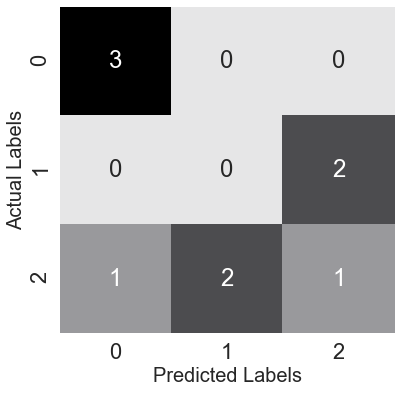

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]
cm = metrics.confusion_matrix(y_true,y_pred)
plt.figure(figsize=(6,6))
cmap = sns.cubehelix_palette(50,hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.set(font_scale=2)
sns.heatmap(cm,annot=True,cmap=cmap,cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

#### Multi-label classification

In [29]:
def pk(y_true,y_pred,k):
    if k == 0:
        return 0
    y_pred = y_pred[:k]
    pred_set = set(y_pred)
    true_set = set(y_true)
    common_values = pred_set.intersection(true_set)
    return len(common_values) / len(y_pred[:k])


In [30]:
def apk(y_true,y_pred,k):
    pk_values = []
    for i in range(1, k + 1):
        pk_values.append(pk(y_true,y_pred,i))
    if len(pk_values) == 0:
        return 0
    return sum(pk_values) / len(pk_values)

In [31]:
y_true = [
    [1,2,3],
    [0,2],
    [1],
    [2,3],
    [1,0],
    []
]

y_pred = [
    [0,1,2],
    [1],
    [0,2,3],
    [2,3,4,0],
    [0,1,2],
    [0]
]

In [32]:
for i in range(len(y_true)):
    for j in range(1,4):
        print(f"""
        y_true={y_true[i]},
        y_pred={y_pred[i]},
        AP@{j}={apk(y_true[i], y_pred[i], k=j)}
        """)



        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@1=0.0
        

        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@2=0.25
        

        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@3=0.38888888888888884
        

        y_true=[0, 2],
        y_pred=[1],
        AP@1=0.0
        

        y_true=[0, 2],
        y_pred=[1],
        AP@2=0.0
        

        y_true=[0, 2],
        y_pred=[1],
        AP@3=0.0
        

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@1=0.0
        

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@2=0.0
        

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@3=0.0
        

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@1=1.0
        

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@2=1.0
        

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@3=0.8888888888888888
        

        y_true=[1, 0],
        y_pred=[0, 1, 2],
        AP@1=1.

In [33]:
def mapk(y_true,y_pred,k):
    apk_values = []
    for i in range(len(y_true)):
        apk_values.append(apk(y_true[i],y_pred[i],k=k))
    return sum(apk_values) / len(apk_values)

In [34]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]
y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
    ]
print(mapk(y_true,y_pred,k=1))
print(mapk(y_true,y_pred,k=2))
print(mapk(y_true,y_pred,k=3))
print(mapk(y_true,y_pred,k=4))

0.3333333333333333
0.375
0.3611111111111111
0.34722222222222215


In [35]:
def apk (actual, predicted, k =10):
    if len(predicted) >k:
        predicted = predicted[:k]
    score =0.0
    num_hits = 0.0
    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits/(i+1.0)
    if not actual:
        return 0.0
    return score/min(len(actual),k) 
        

<b>MAtthew's Corrrelation Coefficient (MCC)</b><br>
<i>MCC ranges from -1 to 1. 1 in perfect and -1 in imperfect</i><br>
`MCC = `
`-              TP * TN - FP * FN                                 -`<br>
`    ------------------------------------------------------------------`<br>
`-        [(TP + FP) * (FN + TN) * (FP + TN) * (TP + FN) ] ^ (0.5)`

In [38]:
def mcc(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    tn = true_negative(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    numerator = (tp * tn) - (fp * fn)
    denominator = (
        (tp + fp)*
        (fn + tn)*
        (fp + tn)*
        (tp + fn)
    )
    denominator = denominator ** 0.5
    return numerator/denominator